In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [44]:
dataset_dir = r"C:\Users\sarve\Desktop\dl\datasets\caltech-101"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [45]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [50]:
# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
# base_model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')



In [51]:
for layer in base_model.layers:
   layer.trainable = False

In [52]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1840 - loss: 4.0610 - val_accuracy: 0.2650 - val_loss: 3.5394
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3170 - loss: 3.2193 - val_accuracy: 0.3420 - val_loss: 3.1304
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4235 - loss: 2.7297 - val_accuracy: 0.4235 - val_loss: 2.7774
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5015 - loss: 2.3069 - val_accuracy: 0.4620 - val_loss: 2.5124
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5780 - loss: 1.9774 - val_accuracy: 0.4920 - val_loss: 2.3012
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6260 - loss: 1.7106 - val_accuracy: 0.5220 - val_loss: 2.1460
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6855 - loss: 1.5014 - val_accuracy: 0.5300 - val_loss: 2.0953
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7115 - loss: 1.3391 - val_accuracy: 0.5395 - val_loss:

In [55]:

# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.3470 - loss: 3.2286 - val_accuracy: 0.4835 - val_loss: 2.3884
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5655 - loss: 1.9066 - val_accuracy: 0.5615 - val_loss: 1.8862
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6945 - loss: 1.2331 - val_accuracy: 0.5855 - val_loss: 1.7679
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7795 - loss: 0.8269 - val_accuracy: 0.6210 - val_loss: 1.6597
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8670 - loss: 0.5137 - val_accuracy: 0.6250 - val_loss: 1.7198
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9180 - loss: 0.3145 - val_accuracy: 0.6210 - val_loss: 1.7640
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9405 - loss: 0.2162 - val_accuracy: 0.6140 - val_loss: 1.8569
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9630 - loss: 0.1511 - val_accuracy: 0.6365 - val_loss:

In [56]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step


In [57]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  cellphone
Actual:  cellphone


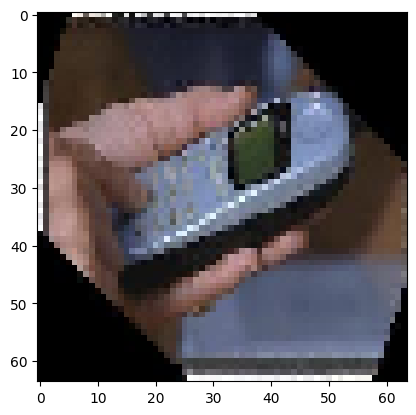

In [58]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])